In [85]:
# Let's load the provided Excel file and inspect its contents to understand the structure of the dataset.
import pandas as pd
import datetime

# Load the dataset
file_path = 'Online retail.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows and column names
df.head(), df.columns

now = datetime.datetime.now(datetime.timezone.utc)
now
df
df.head(), df.columns

(  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
 0                             burgers,meatballs,eggs                                                                                                                                                                             
 1                                            chutney                                                                                                                                                                             
 2                                     turkey,avocado                                                                                                                                                                             
 3  mineral water,milk,energy bar,whole wheat rice...                                       

In [75]:
#Data Processing.
#Since the entire dataset appears to be in one column, let's split the product names into a list for each row.
df.columns = ['Products']  # Rename the single column for clarity

# Split the product names based on commas, and treat each row as a list of items
df_split = df['Products'].str.split(',', expand=True)

# Display the first few rows of the transformed data
df_split.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [30]:
missing_values = df.isnull().sum()
missing_values

Products    0
dtype: int64

In [32]:
df.describe()

,Products
count,7500
unique,5175
top,cookies
freq,223


In [87]:
# We will now one-hot encode the presence of each product in each transaction.
# First, we need to flatten the dataset into a format where each unique product is its own column with binary (1/0) values.

# Stack the split product columns and remove None values (empty fields)
df_stack = df_split.stack().reset_index(drop=True, level=1)  # This reshapes the data into a single column of products

# One-hot encode the product names, marking their presence in each transaction
basket_encoded = pd.get_dummies(df_stack).groupby(level=0).sum()

# Display the first few rows of the one-hot encoded transactional data
basket_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
%pip install mlxtend



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.4 MB 325.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 544.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 984.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 1.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.6 MB/s eta 0:00:01
   -------------------- -------

In [47]:
# Import the necessary libraries for Apriori and association rules
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.01
# Convert the basket_encoded DataFrame into boolean values
basket_encoded_bool = basket_encoded.astype(bool)

# Now apply the Apriori algorithm again
frequent_itemsets = apriori(basket_encoded_bool, min_support=0.01, use_colnames=True)

# Generate the association rules with a minimum confidence of 0.5 and lift greater than 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on a confidence threshold of 0.5
rules = rules[rules['confidence'] >= 0.5]

# Display the top 5 rules
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
344,"(eggs, ground beef)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
378,"(ground beef, milk)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177


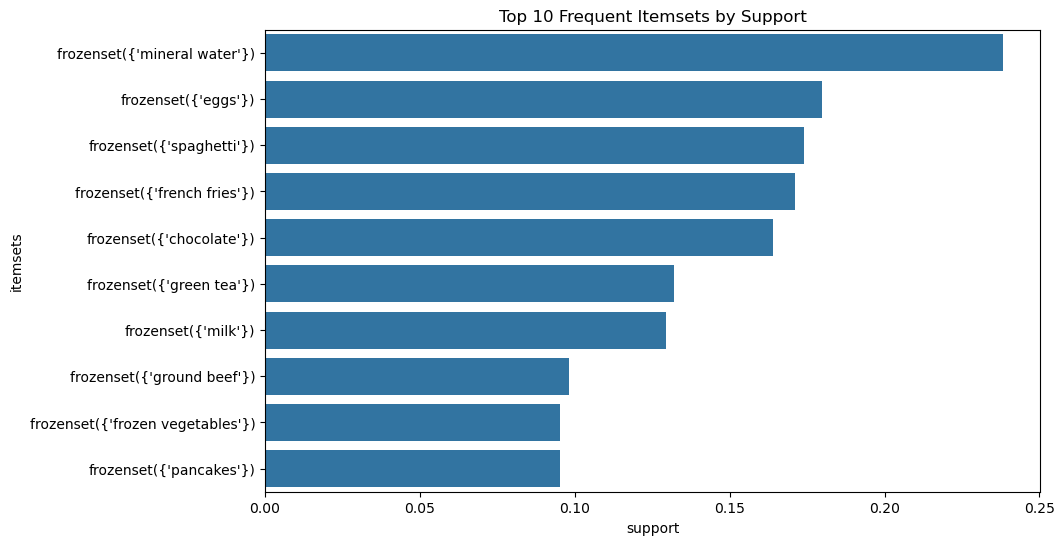

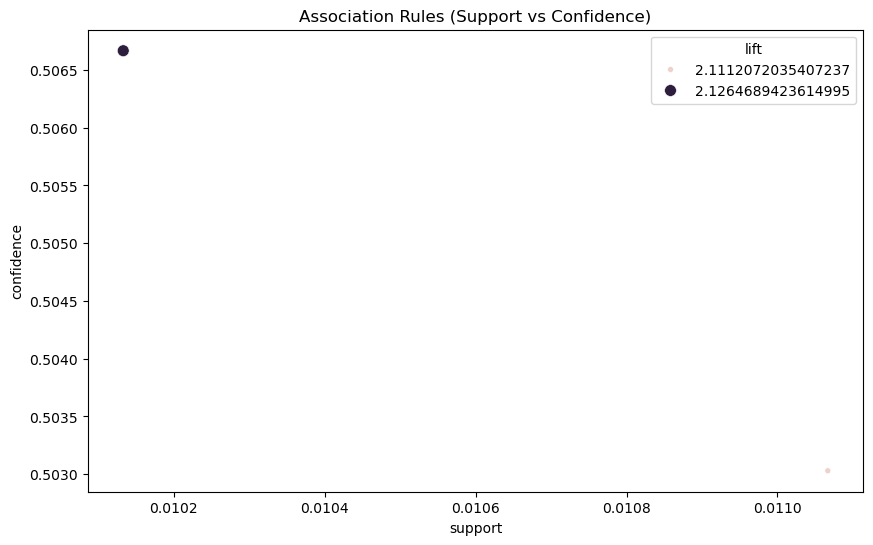

In [53]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Sort the rules by lift
rules.sort_values('lift', ascending=False).head()

# Plot a heatmap of the most frequent items based on support
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values('support', ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets by Support')
plt.show()

# Visualize association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules)
plt.title('Association Rules (Support vs Confidence)')
plt.show()


In [94]:
#Analysis and Interpretation

interesting_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 2)]

# Step 3.2: Display interesting rules
print("Interesting Rules:")
print(interesting_rules)

#Insights based on the discovered rules
for index, row in interesting_rules.iterrows():
    print(f"Rule: If a customer buys {row['antecedents']} then they are likely to buy {row['consequents']} with a lift of {row['lift']:.2f}.")


Interesting Rules:
             antecedents      consequents  antecedent support  \
344  (eggs, ground beef)  (mineral water)               0.020   
378  (ground beef, milk)  (mineral water)               0.022   

     consequent support   support  confidence      lift  leverage  conviction  \
344            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
378            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   

     zhangs_metric  
344       0.540548  
378       0.538177  
Rule: If a customer buys frozenset({'eggs', 'ground beef'}) then they are likely to buy frozenset({'mineral water'}) with a lift of 2.13.
Rule: If a customer buys frozenset({'ground beef', 'milk'}) then they are likely to buy frozenset({'mineral water'}) with a lift of 2.11.
